In [189]:
import wrftools as wrf
import numpy as np
import matplotlib.pyplot as plt
import genutils as gu
from scipy.signal import convolve2d
from scipy.signal import convolve
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess
import importlib
importlib.reload(wrf)
importlib.reload(gu)

<module 'genutils' from '/net/wrfstore6/disk1/nsparks/itc/python/genutils.py'>

In [201]:
def getvmax(xrz):
    if xrz.ndim == 1: # reshape to 2d
        xrz=np.expand_dims(xrz,1)
    xrzs=xrz # copy for smoothing
    x=np.arange(xrz.shape[0]) # x coord for smoothing
    for z in range(xrz.shape[1]):
        xrzs[:,z]=lowess(xrz[:,z], x, frac=0.04, it=1,return_sorted=False)
    xm=np.nanmax(xrzs)
    xmx=np.where(xrzs == xm)
    rmax=xmx[0][0]
    zmax=xmx[1][0]
    return(xm,rmax,zmax)

In [202]:
run='run_CTRL_rr'
f='wrfout_d03_2007-09-13_00:00:00'
var='V'
force=True
Vr=wrf.getWRF(wrf.wopath(run,f),var,vtype='az',force=force)
# Vrzsm=gu.smooth(Vrz,5)

Creating: run_CTRL_rr/wrfout_d03_2007-09-13_00:00:00.V10.az.npy
Creating: run_CTRL_rr/wrfout_d03_2007-09-13_00:00:00.V10.raw.npy
Creating: run_CTRL_rr/wrfout_d03_2007-09-13_00:00:00.cc.raw.npy
Creating: run_CTRL_rr/wrfout_d03_2007-09-13_00:00:00.cc.raw.npy


34.40004 59999.996337890625 0


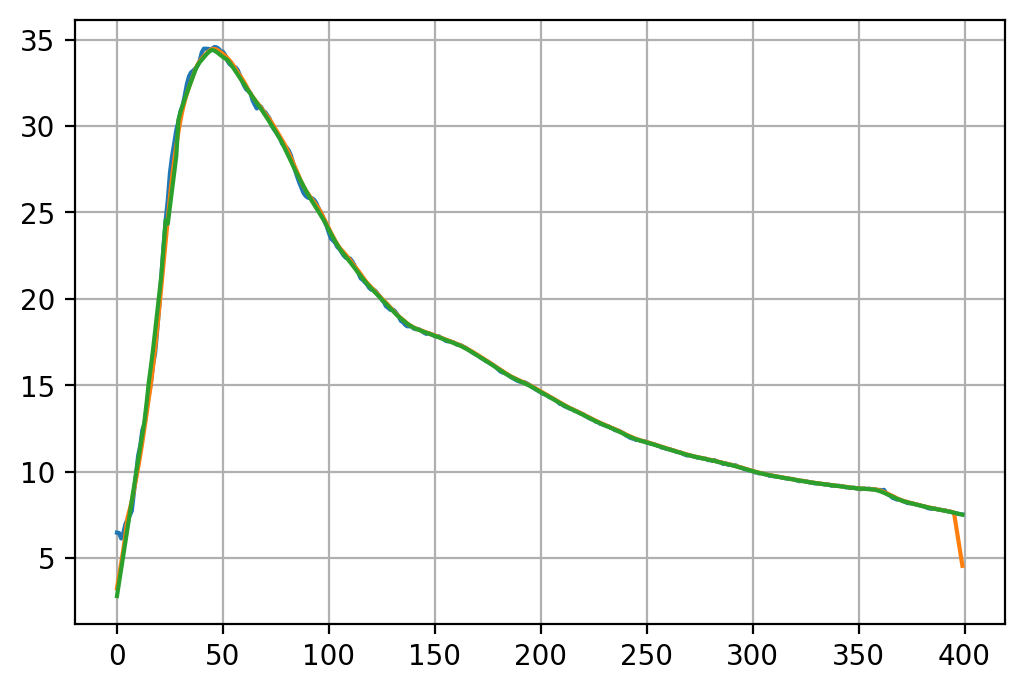

In [203]:
N=10
Vrsm=convolve(Vr, np.ones((N))/N,mode='same')
x=np.arange(len(Vr))/len(Vr)
y=Vr
l=lowess(y, x, frac=0.04, it=1,return_sorted=False)

fig,ax=plt.subplots(1,1,dpi=200)
plt.plot(Vr)
plt.plot(Vrsm)
plt.plot(l)
plt.grid(True)

Vmax,Rmax,zVmax=getvmax(Vr)
xc,yc=wrf.getCoords(run,f)
dx=np.diff(xc)[0]
Rmax=Rmax*dx
print(Vmax,Rmax,zVmax)

Creating: run_CTRL_rr/wrfout_d03_2007-09-13_00:00:00.V10.raw.npy
Creating: run_CTRL_rr/wrfout_d03_2007-09-13_00:00:00.cc.raw.npy
Creating: run_CTRL_rr/wrfout_d03_2007-09-13_00:00:00.Psfc.raw.npy
Creating: run_CTRL_rr/wrfout_d03_2007-09-13_00:00:00.cc.raw.npy
[363 660]


(0.0, 800.0)

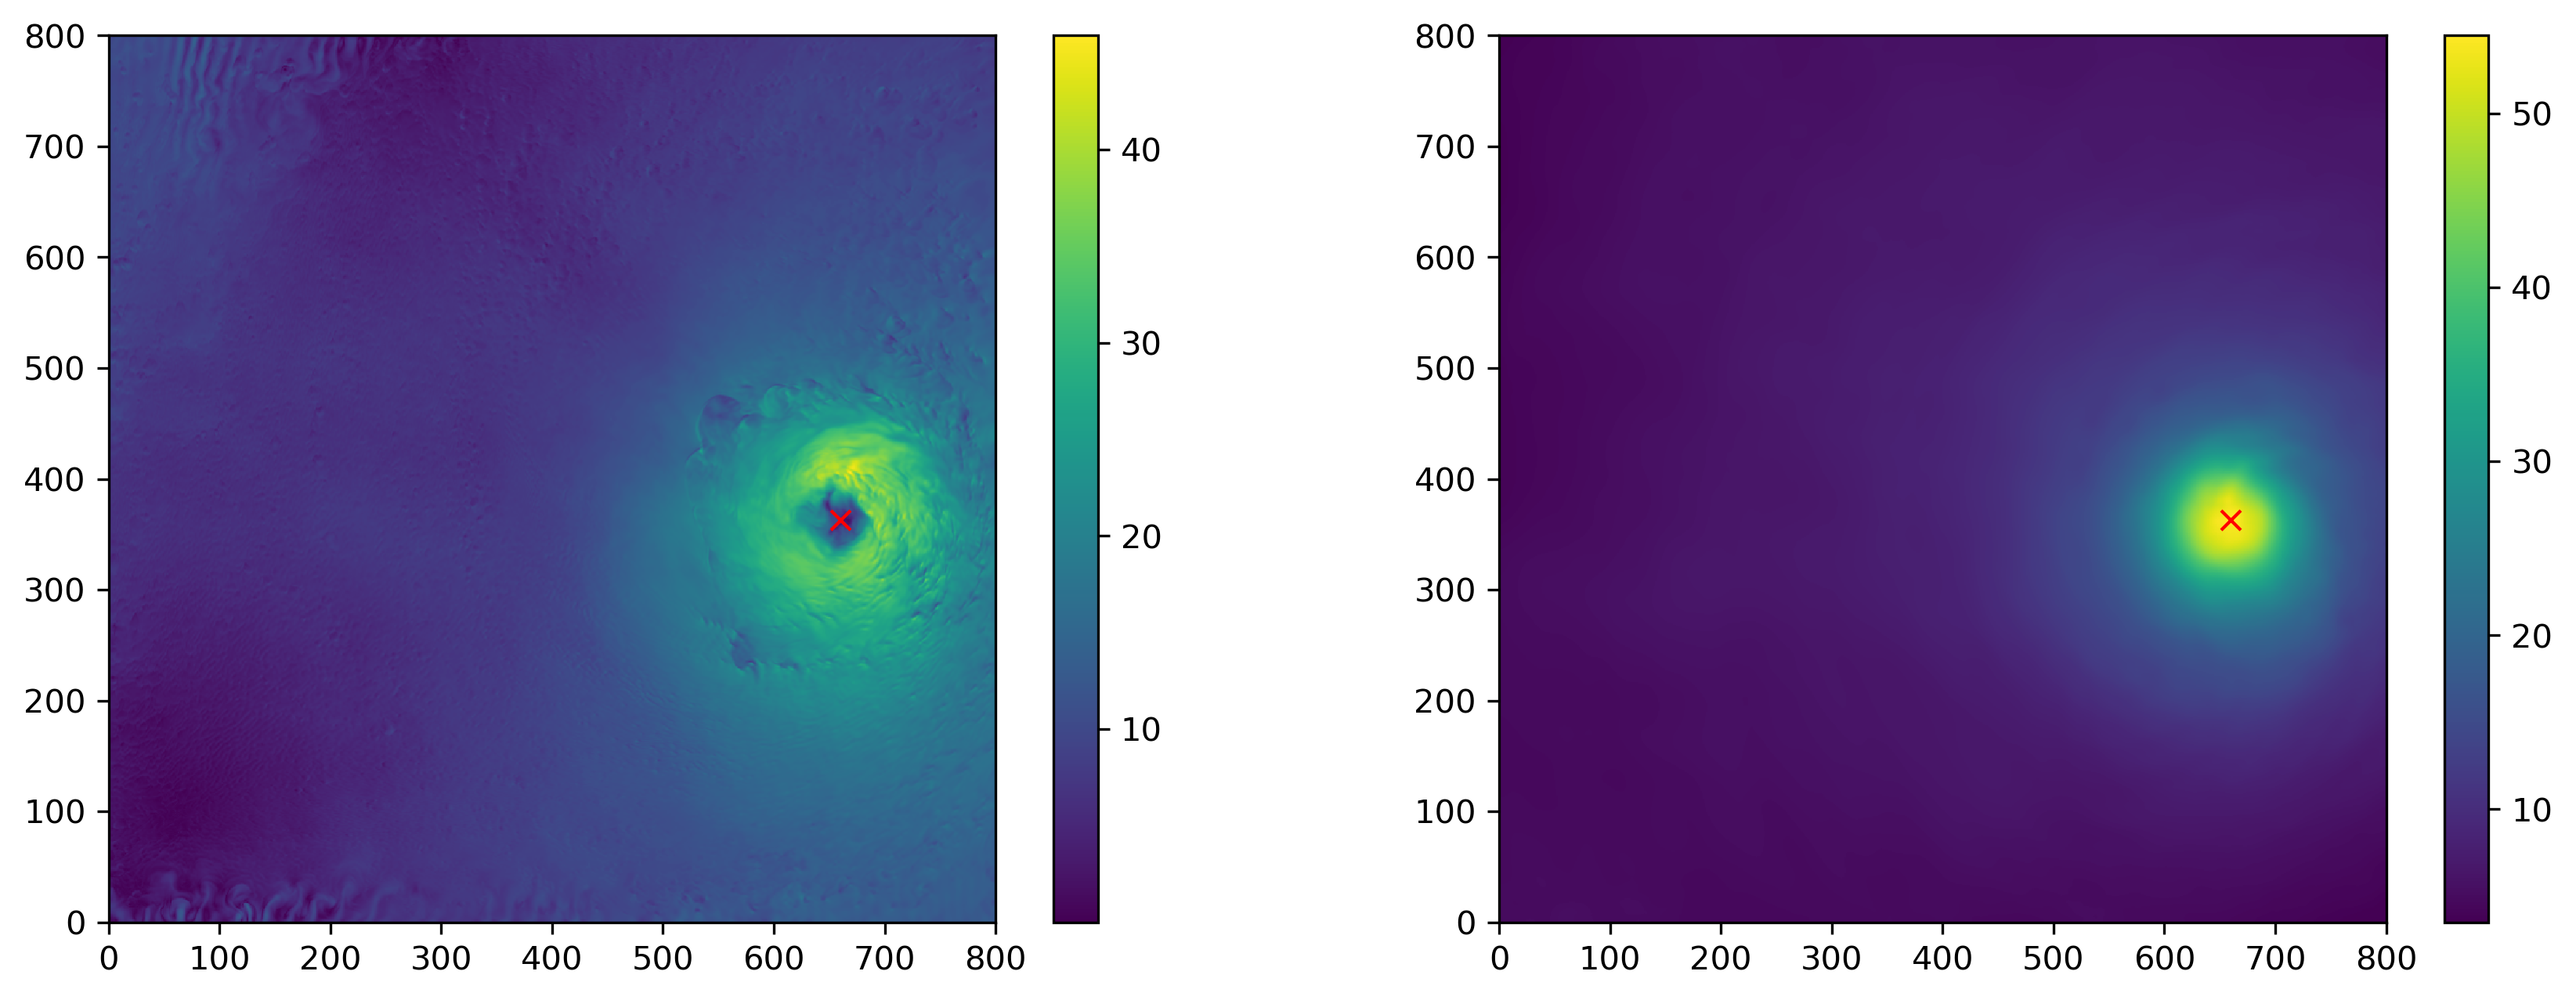

In [181]:
V=wrf.getWRF(wrf.wopath(run,f),'V',vtype='raw',force=force) 
P=wrf.getWRF(wrf.wopath(run,f),'P',vtype='raw',force=force)
cc=wrf.getWRF(wrf.wopath(run,f),'cc',vtype='raw',force=force) 
Ps=gu.smooth2d(P,15)

print(cc)
# xl=(600,700)
# yl=(300,400)
xl=(300,500)
yl=(300,500)

xl=(000,800)
yl=(000,800)


fig,axs=plt.subplots(1,2,dpi=300,figsize=(14,5))
ax=axs[0]
h=ax.pcolormesh(V);
ax.plot(cc[1],cc[0],'rx')
ax.set_aspect('equal')
plt.colorbar(h,ax=ax)
ax.set_xlim(xl)
ax.set_ylim(yl)

ax=axs[1]
h=ax.pcolormesh(1016-Ps);
ax.plot(cc[1],cc[0],'rx')
ax.set_aspect('equal')
plt.colorbar(h,ax=ax)
ax.set_xlim(xl)
ax.set_ylim(yl)


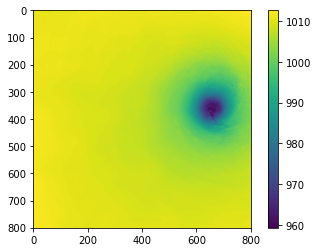

In [182]:
plt.imshow(P)
plt.colorbar()

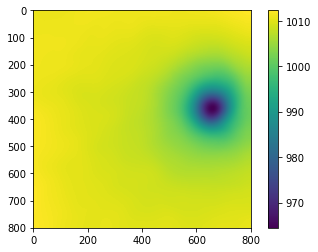

In [183]:
N=50
from scipy.signal import convolve2d
Ps=convolve2d(P, np.ones((N,N))/(N*N),mode='same',boundary='symm')
plt.imshow(Ps)
plt.colorbar()

In [41]:
P.ndim

2